In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("winequality-red.csv")

In [5]:
# Check the red whine dataset shape here (rows x columns)
df.shape

(1599, 12)

In [6]:
# Print top 5 rows of red dataset
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Print quality unique values with ascending order
sorted(df['quality'].unique())
# As you can see the output It's classification problem.

[3, 4, 5, 6, 7, 8]

In [8]:
# Check the null values in dataframe.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [346]:
# Check description of dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [347]:
# Identifiying outliers with Inter Quartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [348]:
# Print Outliers in True and False
df < (Q1 - 1.5 * IQR) | (df > (Q3 + 1.5 * IQR))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,True,True,False,True,False,False,True,False,True,False,False
1,False,True,True,False,True,False,False,True,False,True,False,False
2,False,True,True,False,True,False,False,True,False,True,False,False
3,False,True,True,False,True,False,False,True,False,True,False,False
4,False,True,True,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,True,True,False,True,False,False,True,False,True,False,False
1595,False,True,True,False,True,False,False,True,False,True,False,False
1596,False,True,True,False,True,False,False,True,False,True,False,False
1597,False,True,True,False,True,False,False,True,False,True,False,False


In [349]:
# Find outliers with the skewness
df['fixed acidity'].skew()

0.9827514413284587

In [350]:
df['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [351]:
# I dentifying the outliers with the Visualization

## 1. Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f86f9425748>,
 'caps': [<matplotlib.lines.Line2D at 0x7f86f9425cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f86f94254e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f86f958be80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f86f9d6d198>],
 'means': []}

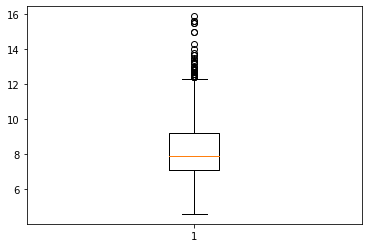

In [352]:
plt.boxplot(df['fixed acidity'])

<AxesSubplot:title={'center':'fixed acidity'}, xlabel='quality'>

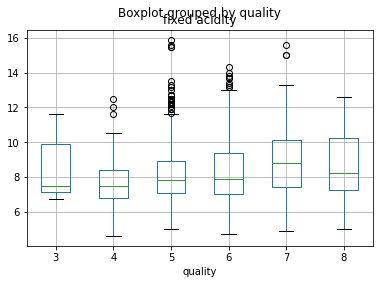

In [353]:
df.boxplot(column='fixed acidity', by='quality')

## 2. Histogram

<AxesSubplot:>

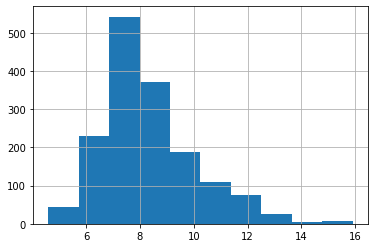

In [354]:
# It is used for visulize the disribution numerical variable.
# An outlier will be the outside of overall pattern of distribution.
df['fixed acidity'].hist()

In [355]:
# Now you can say in above graph. This is the right skewed. Now you can check for other variables as well.

## 3. Scatterplot

In [356]:
# Scatter plot viasulize the relationship in two quantitative variables.
# If the data outside from general clustering that is called outliers.

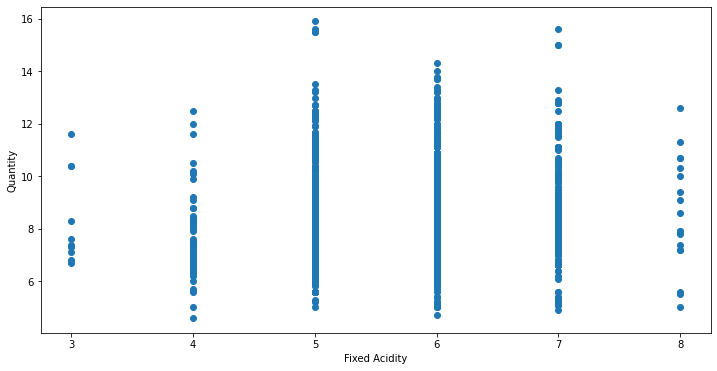

In [357]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['quality'],df['fixed acidity'])
ax.set_xlabel("Fixed Acidity")
ax.set_ylabel("Quantity")
plt.show()

## Outliers Treatment

In [358]:
## IQR Score (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR)

In [359]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(1179, 12)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f86f9464908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f86f9464e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f86f94646a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f86f946a470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f86f946a748>],
 'means': []}

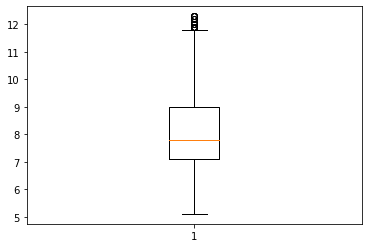

In [360]:
plt.boxplot(df_out['fixed acidity'])

<AxesSubplot:>

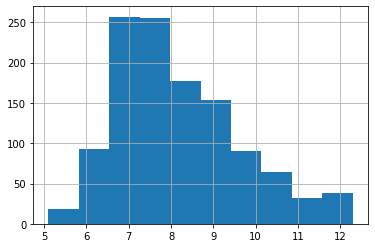

In [361]:
df_out['fixed acidity'].hist()

## Feature Selection

In [362]:
# 1. Reduces Overfitting
# 2. Improves Accuracy
# 3. Reduces Traning Time

### Correlation Matrix with Heatmap

In [363]:
import seaborn as sns

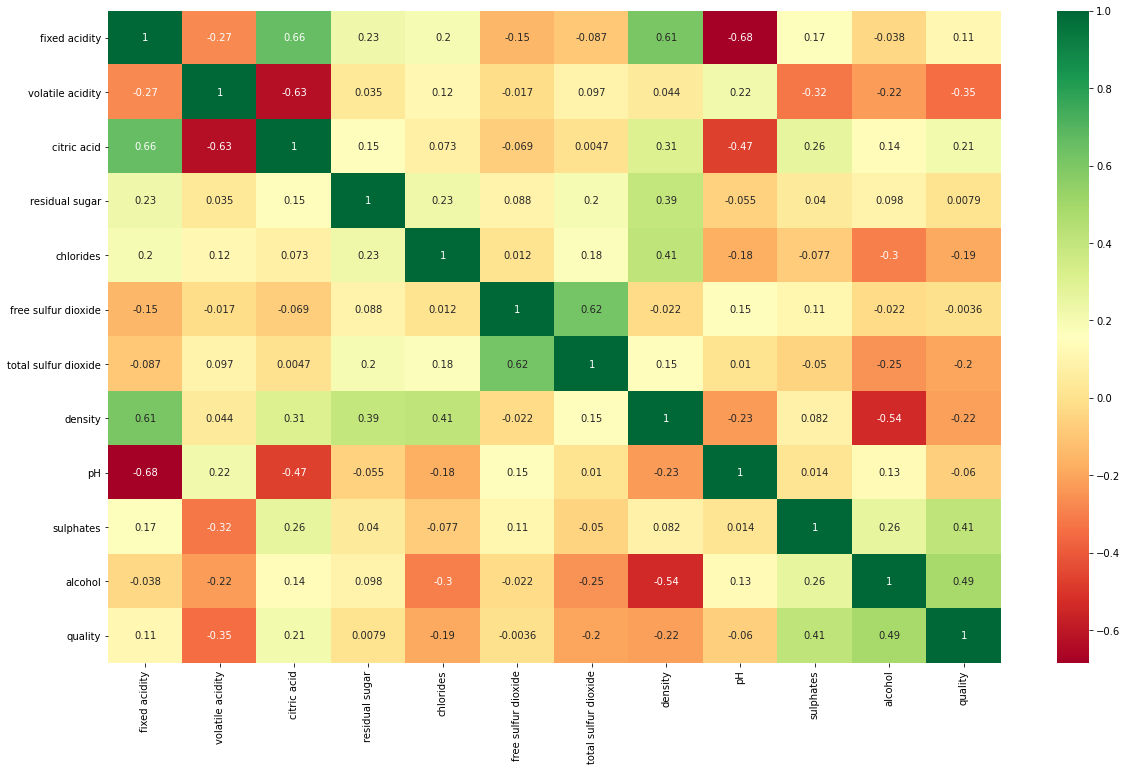

In [364]:
X = df_out.iloc[:,0:11]  #independent columns
y = df_out.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df_out.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,12))

# plot heat map
g=sns.heatmap(df_out.corr(),annot=True,cmap="RdYlGn")

In [365]:
df_out = df_out.drop(['residual sugar', 'free sulfur dioxide'], axis=1)

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
x = df_out.iloc[:, :-1]
y = df_out.iloc[:, -1]

In [368]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Model Traning

### 1. Logistic Regression

In [369]:
from sklearn.linear_model import LogisticRegression

In [370]:
lr = LogisticRegression()

In [371]:
lr.fit(x_train, y_train)

/home/appventurez/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [372]:
y_predict = lr.predict(x_test)
# Measuring the model accuracy
score = lr.score(x_test, y_test)
print(score)

0.6033898305084746


### 2. Naive Bayes

In [373]:
from sklearn.naive_bayes import GaussianNB

In [374]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [375]:
nb.score(x_test, y_test)

0.5796610169491525

### 3. Stochastic Gradient Descent

In [376]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'modified_huber', shuffle=True, random_state=101)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

In [377]:
# accuracy_score(y_test, y_pred)
sgd.score(x_test, y_test)

0.10508474576271186

### 4. K-Nearest Neighbours

In [378]:
from sklearn.neighbors import KNeighborsClassifier

In [379]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
y_perd = knn.predict(x_test)

In [380]:
knn.score(x_test, y_test)

0.5491525423728814

### 5. Random Forest

In [381]:
from sklearn.ensemble import RandomForestClassifier

In [382]:
rfm = RandomForestClassifier(n_estimators=100, oob_score = True, n_jobs=1,
                            random_state=101, max_features = None, min_samples_leaf = 60)
rfm.fit(x_train, y_train)
y_perd = rfm.predict(x_test)

In [383]:
rfm.score(x_test, y_test)

0.5966101694915255

### 6. Support Vector Machine

In [384]:
from sklearn.svm import SVC

In [398]:
svm = SVC(kernel="linear", C=0.025, random_state=101)
svm.fit(x_train, y_train)

SVC(C=0.025, kernel='linear', random_state=101)

In [399]:
y_pred = svm.predict(x_test)

In [403]:
svm.score(x_test, y_test)

0.6135593220338983

In [388]:
# My Accuracy is very low now I am trying to improve accuracy of my model.